# Amply Innovations Private Limited

Created by: Aneesa Begum J

**Task:** Analyze wearable device data to correlate physical activity metrics with cardiovascular health outcomes. Utilize machine learning for predictive modeling and longitudinal analysis to identify trends over time. Provide personalized health recommendations based on findings to optimize cardiovascular fitness and overall well-being.


In [76]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Dataset Overview**

This dataset contains daily activity data from wearable devices, likely collected from users' fitness trackers. The columns represent various physical activity metrics, distances covered, and calorie expenditure.


* **Id:** Unique identifier for each user.

* **ActivityDate:**  The date of the recorded activity.

*   **TotalSteps:**  The total number of steps taken by the user on that day.

*  **TotalDistance :** The total distance covered by the user on that day.

*   **TrackerDistance:** The distance tracked by the wearable device.

*  **LoggedActivitiesDistance**: Distance covered in activities logged by the user.

*   **VeryActiveDistance:** Distance covered while very active.

*  **ModeratelyActiveDistance:**Distance covered while moderately active.

*  **LightActiveDistance:**Distance covered while lightly active.

*  **SedentaryActiveDistance:** Distance covered while sedentary.

*  **VeryActiveMinutes:** Minutes spent being very active.

*  **FairlyActiveMinutes:** Minutes spent being fairly active.

*  **LightlyActiveMinutes:** Minutes spent being lightly active.

*  **SedentaryMinutes:** Minutes spent being sedentary.

*  **Calories:** Total calories burned by the user on that day.


In [6]:
# Load the data
df=pd.read_csv("/content/dailyActivity_merged.csv")

In [7]:
# Display the first 10 rows of the dataset
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [8]:
# shape of the data
df.shape

(457, 15)

Dropping 'TrackerDistance' column since the 'TotalDistance' and 'TrackerDistance' are having the same values

In [9]:
new_df=df.drop("TrackerDistance", axis=1)
new_df.shape

(457, 14)

In [10]:
# checking the info of the data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   LoggedActivitiesDistance  457 non-null    float64
 5   VeryActiveDistance        457 non-null    float64
 6   ModeratelyActiveDistance  457 non-null    float64
 7   LightActiveDistance       457 non-null    float64
 8   SedentaryActiveDistance   457 non-null    float64
 9   VeryActiveMinutes         457 non-null    int64  
 10  FairlyActiveMinutes       457 non-null    int64  
 11  LightlyActiveMinutes      457 non-null    int64  
 12  SedentaryMinutes          457 non-null    int64  
 13  Calories                  457 non-null    int64  
dtypes: float64

In [11]:
# Summary statistics
new_df.describe()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [12]:
# Convert 'ActivityDate' to datetime
new_df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [13]:
# checking null values
new_df.isnull().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0
VeryActiveMinutes,0


In [14]:
# checking duplicates
new_df.duplicated().sum()

0

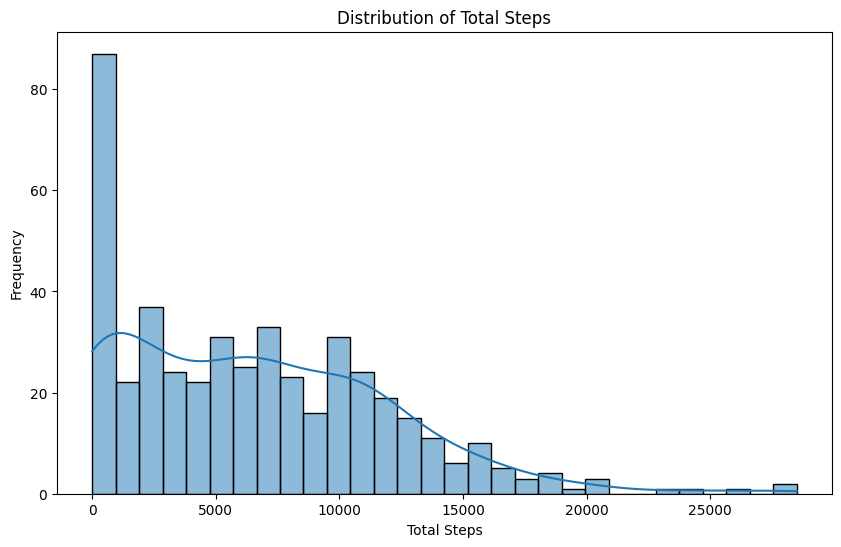

In [15]:
# Visualize the distribution of Total Steps
plt.figure(figsize=(10, 6))
sns.histplot(new_df['TotalSteps'], kde=True, bins=30)
plt.title('Distribution of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.show()

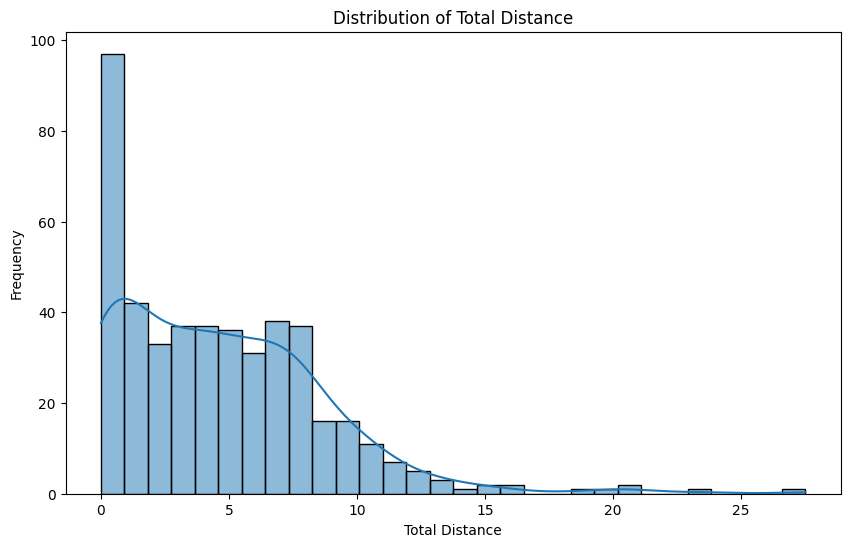

In [16]:
# Visualize the distribution of Total Distance
plt.figure(figsize=(10, 6))
sns.histplot(new_df['TotalDistance'], kde=True, bins=30)
plt.title('Distribution of Total Distance')
plt.xlabel('Total Distance')
plt.ylabel('Frequency')
plt.show()

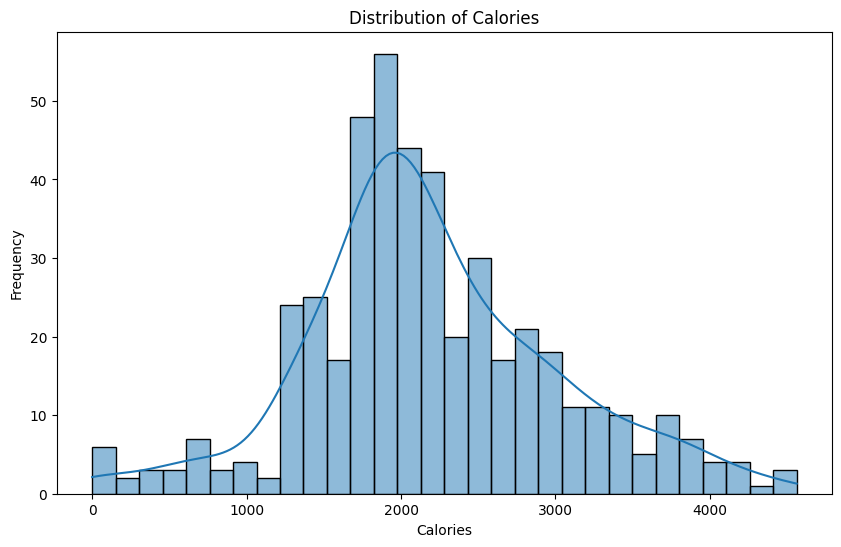

In [17]:
# Visualize the distribution of Calories Burned
plt.figure(figsize=(10, 6))
sns.histplot(new_df['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

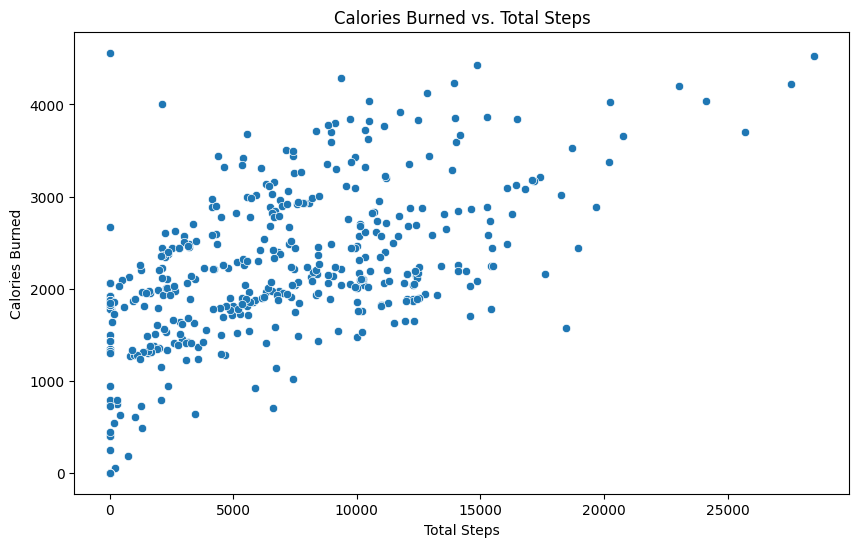

In [18]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=new_df)
plt.title('Calories Burned vs. Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()


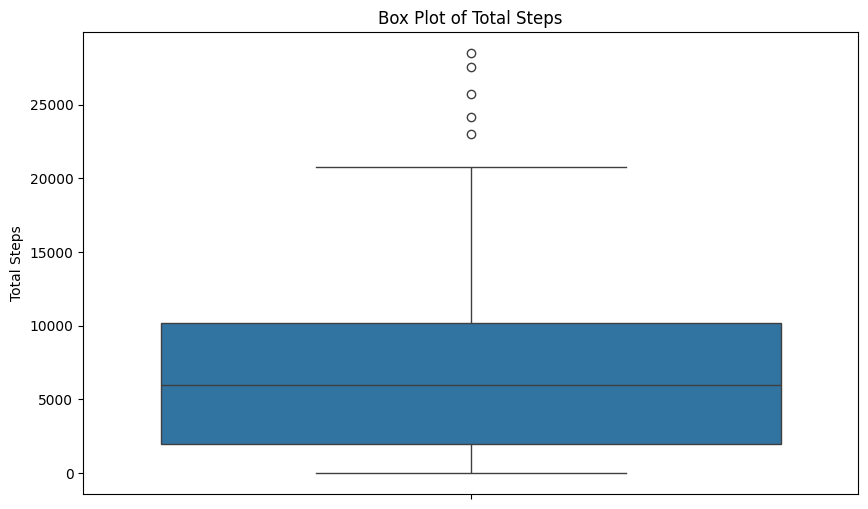

In [20]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=new_df['TotalSteps'])
plt.title('Box Plot of Total Steps')
plt.ylabel('Total Steps')
plt.show()


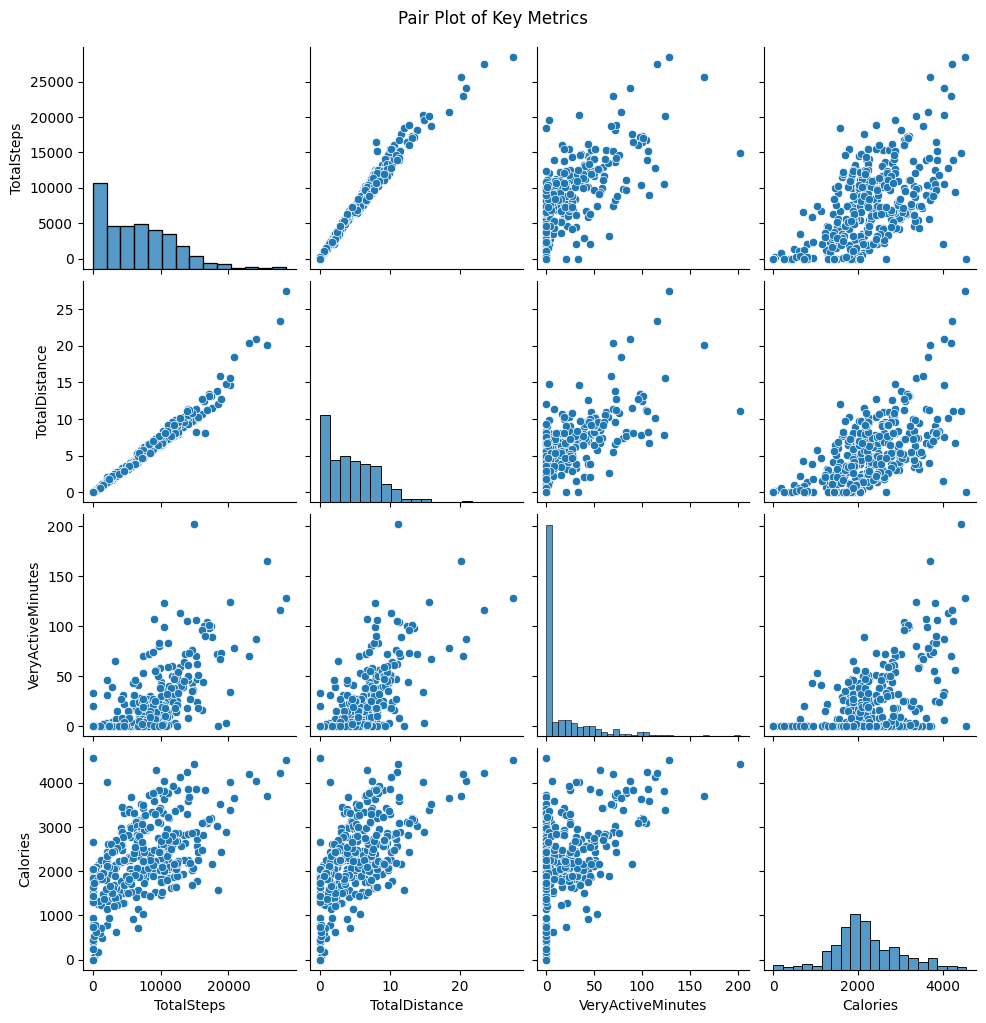

In [21]:
# pair plot
sns.pairplot(new_df[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'Calories']])
plt.suptitle('Pair Plot of Key Metrics', y=1.02)
plt.show()

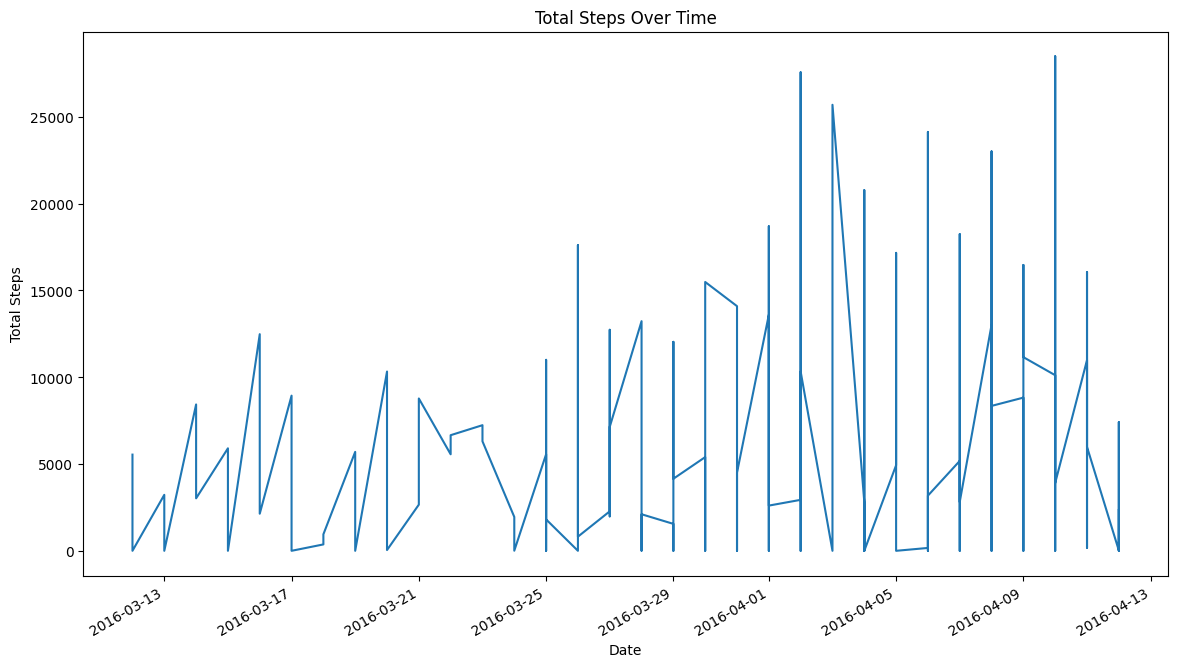

In [22]:
# Trends over time (e.g., total steps)
plt.figure(figsize=(14, 8))
new_df.set_index('ActivityDate')['TotalSteps'].plot()
plt.title('Total Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.show()


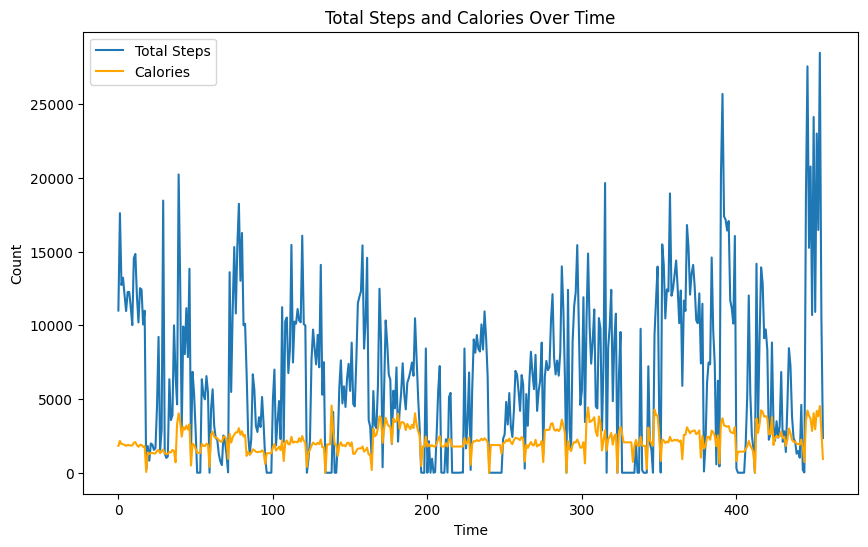

In [23]:
# line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=new_df.index, y='TotalSteps', data=new_df, label='Total Steps')
sns.lineplot(x=new_df.index, y='Calories', data=new_df, label='Calories', color='orange')
plt.title('Total Steps and Calories Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

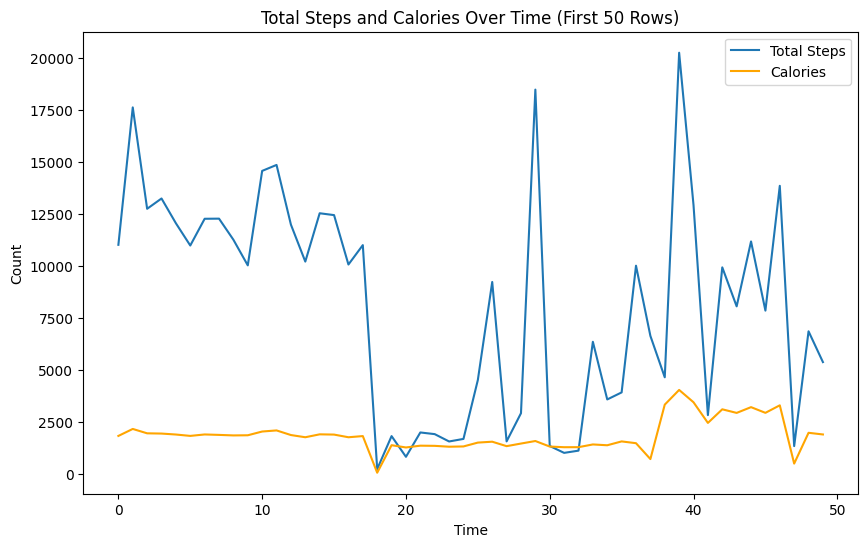

In [24]:
# Subset the first 50 rows of the DataFrame
subset_df = new_df.head(50)

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=subset_df.index, y='TotalSteps', data=subset_df, label='Total Steps')
sns.lineplot(x=subset_df.index, y='Calories', data=subset_df, label='Calories', color='orange')
plt.title('Total Steps and Calories Over Time (First 50 Rows)')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


# Correlation Heatmap

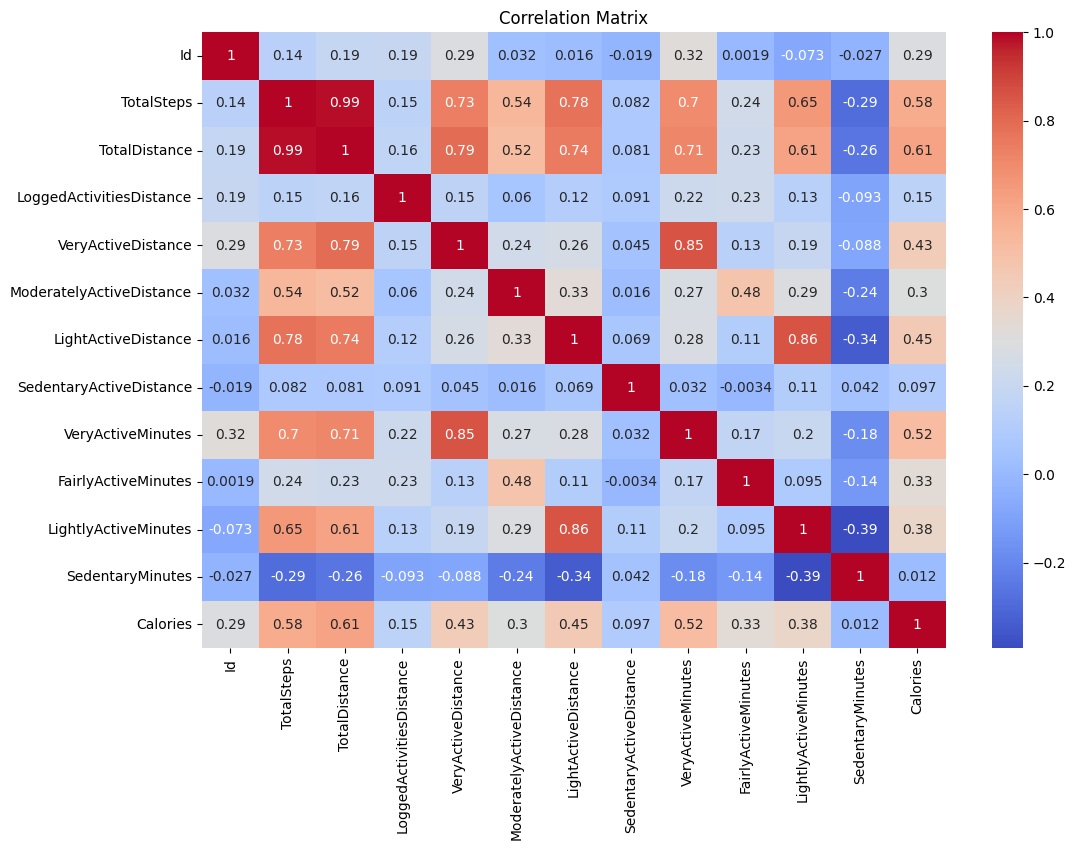

In [25]:
# Excluding non-numeric columns
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])

# Generating the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**INFERENCE:**

There is a positive correlation between TotalSteps and calories(0.59).
The VeryActiveMinutes is also showing a positive correlation for about 0.62 with calories which implies that more calories burn during very active minutes of a body.
SedentaryMinutes and LightActiveMinutes are having the highest negative correlation compared to all the features.

# Checking Outliers of Data using Box plot

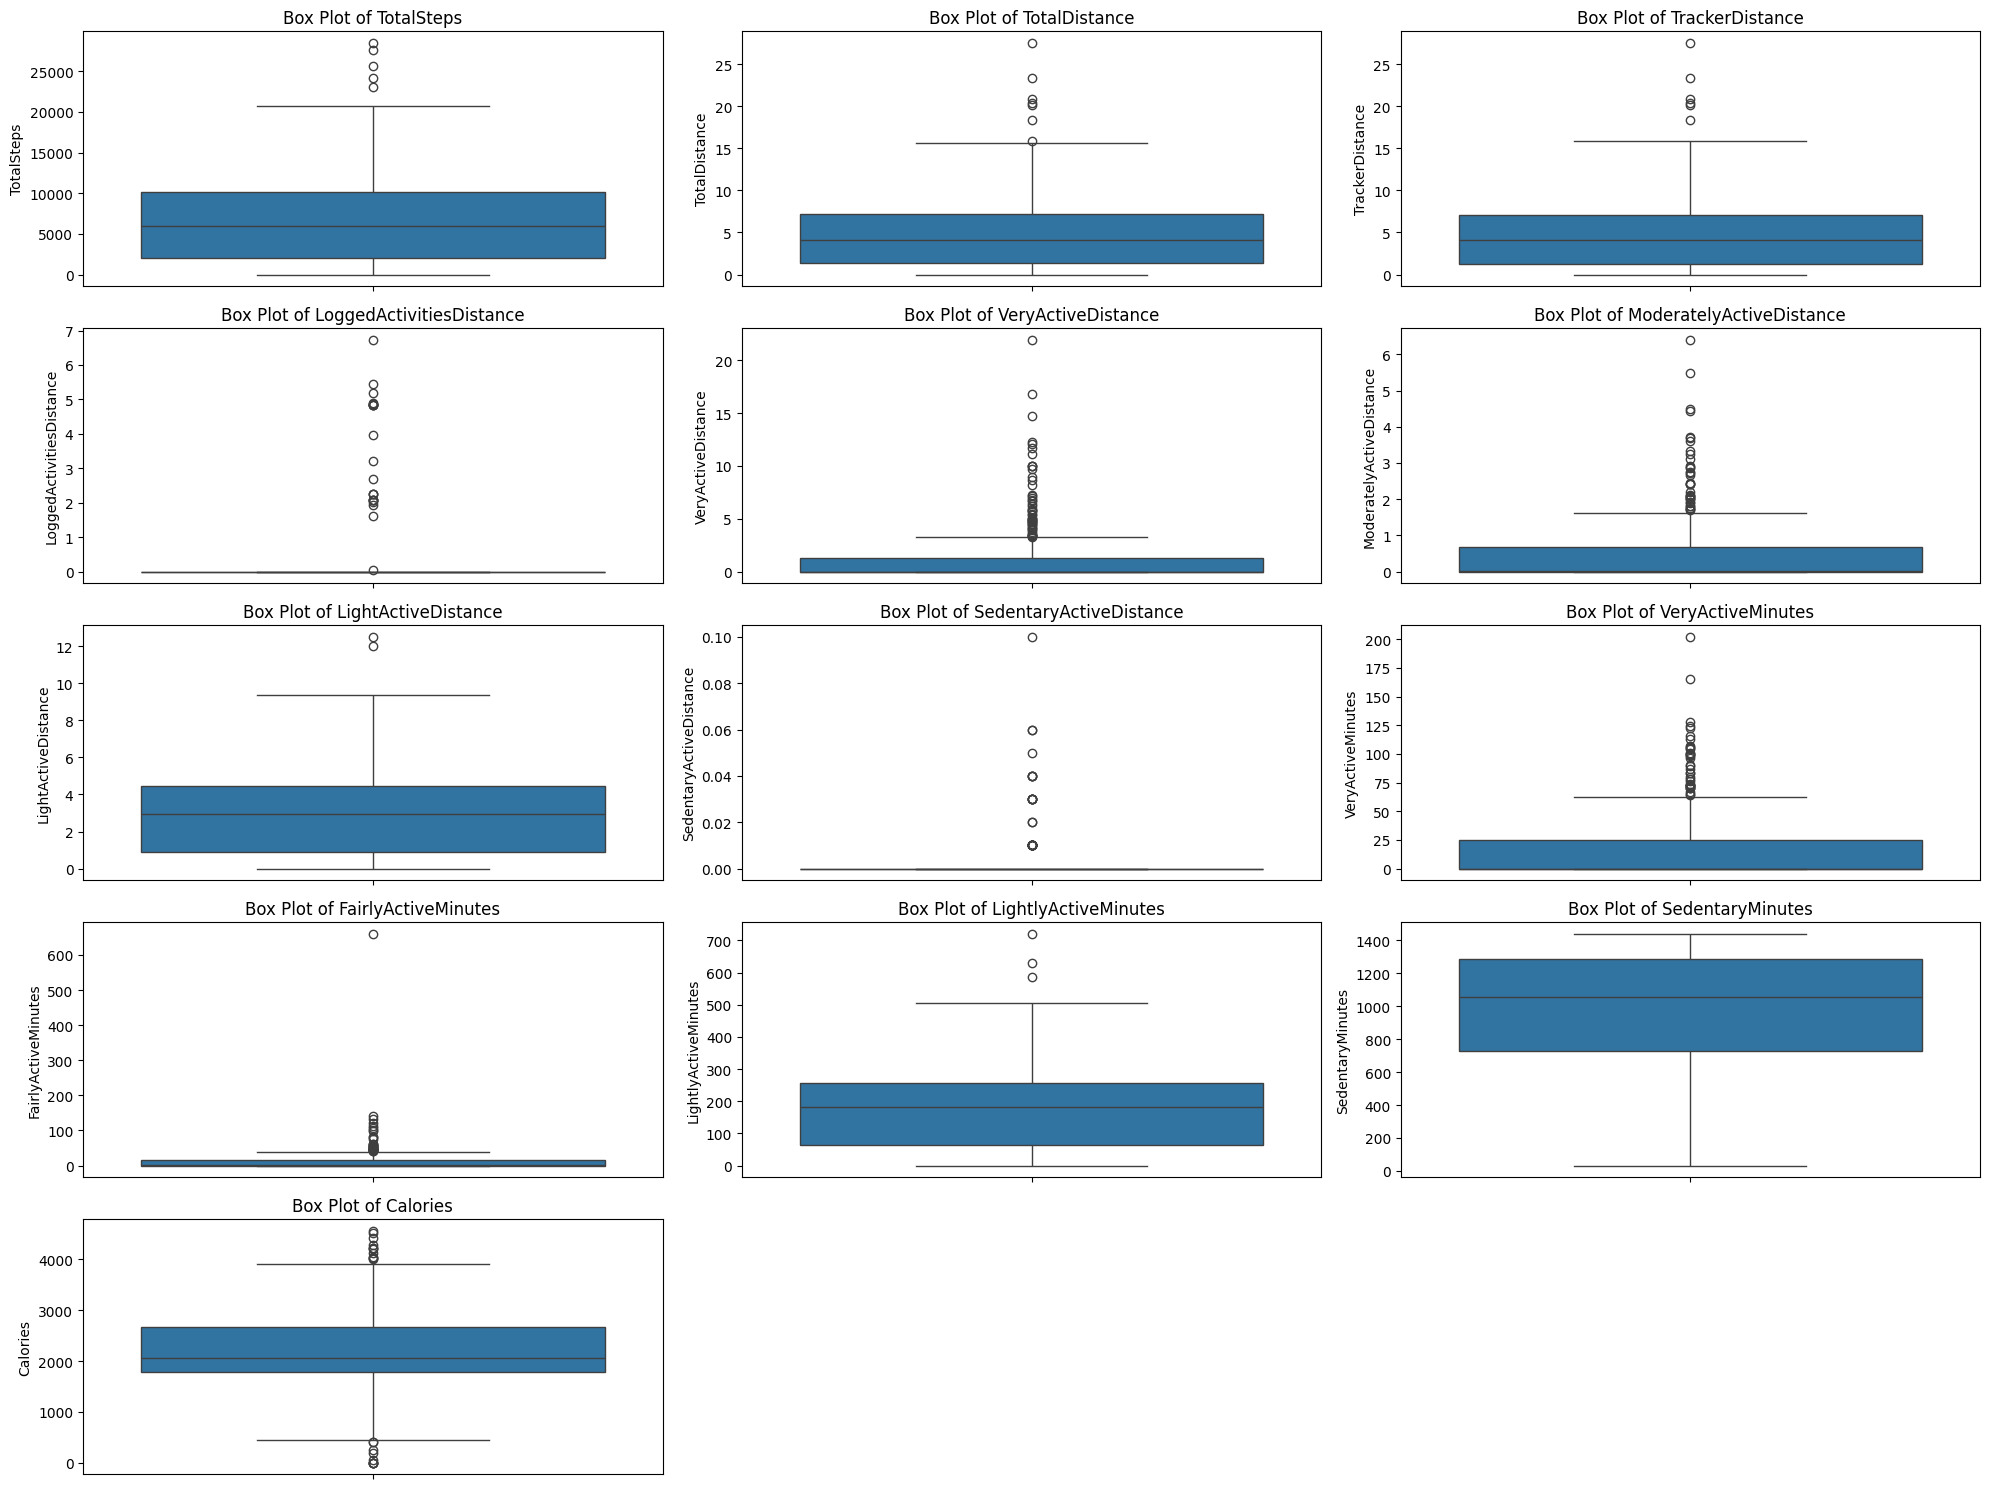

In [26]:
numerical_columns = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                     'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
                     'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
                     'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

#Skewness

In [27]:
import pandas as pd
from scipy.stats import skew

# Calculate skewness for each numerical column
skewness = new_df.select_dtypes(include=[float, int]).apply(skew)

# Display the skewness
print("Skewness")
print(skewness)

Skewness
Id                           0.351566
TotalSteps                   0.800774
TotalDistance                1.317042
LoggedActivitiesDistance     5.142837
VeryActiveDistance           3.718388
ModeratelyActiveDistance     2.961650
LightActiveDistance          0.519870
SedentaryActiveDistance      6.544729
VeryActiveMinutes            2.376902
FairlyActiveMinutes         12.986603
LightlyActiveMinutes         0.351356
SedentaryMinutes            -0.364362
Calories                     0.235581
dtype: float64


#Square Root Transformation for handling the skewness

In [28]:
numerical_columns = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                     'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
                     'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
                     'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

# Check which columns are in the DataFrame
available_columns = [col for col in numerical_columns if col in new_df.columns]

# Print skewness before transformation
print("Skewness before transformation:\n")
for col in available_columns:
    skewness = new_df[col].skew()
    print(f"{col}: {skewness}")

# Apply transformations
new_df_transformed = new_df.copy()

# Square Root Transformation
for col in available_columns:
    new_df_transformed[f'{col}_sqrt'] = np.sqrt(new_df[col])


# Print skewness after transformation
print("\nSkewness after Square Root Transformation:\n")
for col in available_columns:
   print(f"{col} {new_df_transformed[f'{col}_sqrt'].skew()}")

Skewness before transformation:

TotalSteps: 0.8034133949783604
TotalDistance: 1.321383526481455
LoggedActivitiesDistance: 5.159788141949916
VeryActiveDistance: 3.730644209636077
ModeratelyActiveDistance: 2.971412312650807
LightActiveDistance: 0.5215831453096583
SedentaryActiveDistance: 6.5663015488862015
VeryActiveMinutes: 2.3847360297373803
FairlyActiveMinutes: 13.029408464501927
LightlyActiveMinutes: 0.3525141967817267
SedentaryMinutes: -0.3655631138624048
Calories: 0.23635752093401685

Skewness after Square Root Transformation:

TotalSteps -0.352654384574942
TotalDistance -0.2219365046863607
LoggedActivitiesDistance 4.4410589607507465
VeryActiveDistance 1.4787963751240052
ModeratelyActiveDistance 1.0315441310887803
LightActiveDistance -0.5349740955372057
SedentaryActiveDistance 3.960072966453636
VeryActiveMinutes 1.062301094235369
FairlyActiveMinutes 1.970831652918539
LightlyActiveMinutes -0.7061285108556455
SedentaryMinutes -0.9839756501347049
Calories -1.2568756157705703


# Comparing the skewness before and after transformation using histograms

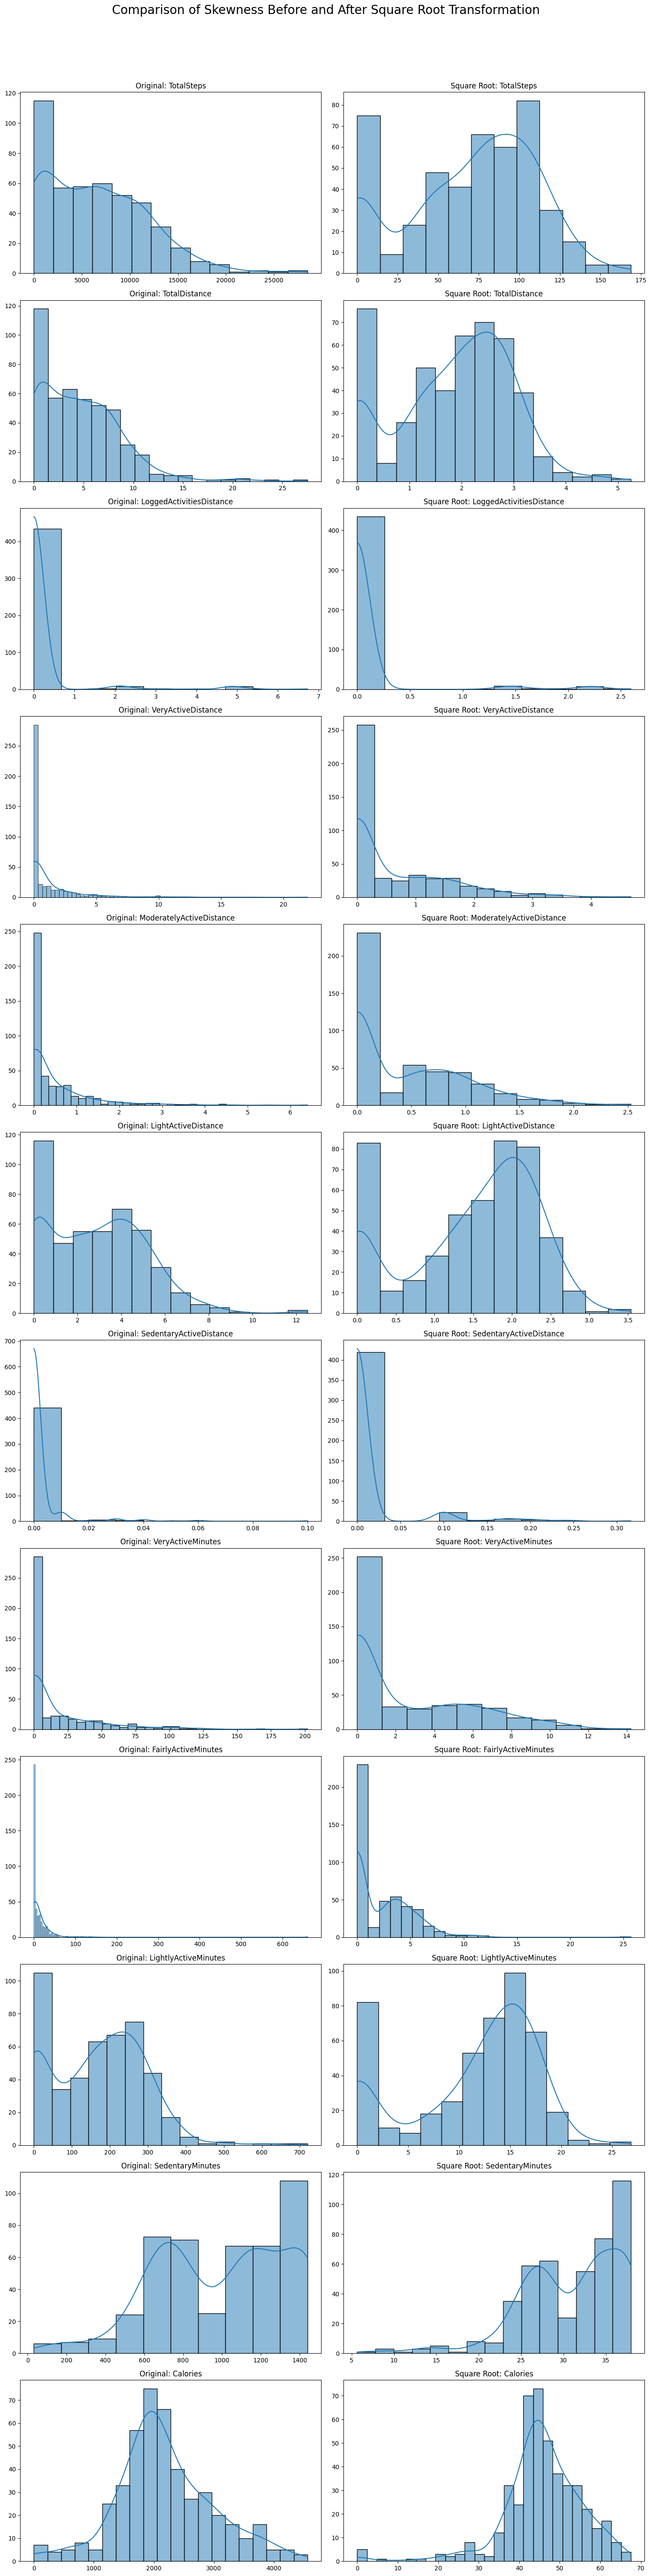

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot histograms and density plots for the square root transformation
def plot_square_root_transformation(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 2, figsize=(15, 5 * num_cols))
    fig.suptitle('Comparison of Skewness Before and After Square Root Transformation', fontsize=20)

    for i, col in enumerate(columns):
        # Original distribution
        sns.histplot(df[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Original: {col}')
        axes[i, 0].set_xlabel('')
        axes[i, 0].set_ylabel('')

        # Square root transformed distribution
        if f'{col}_sqrt' in df.columns:
            sns.histplot(df[f'{col}_sqrt'], kde=True, ax=axes[i, 1])
            axes[i, 1].set_title(f'Square Root: {col}')
            axes[i, 1].set_xlabel('')
            axes[i, 1].set_ylabel('')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot skewness comparison for square root transformation
plot_square_root_transformation(new_df_transformed, available_columns)


# Feature Extraction

In [30]:
# Creating a new column for total active minutes
new_df['TotalActiveMinutes'] = new_df['VeryActiveMinutes'] + new_df['FairlyActiveMinutes'] + new_df['LightlyActiveMinutes']
new_df

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
0,1503960366,2016-03-25,11004,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819,250
1,1503960366,2016-03-26,17609,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154,380
2,1503960366,2016-03-27,12736,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944,329
3,1503960366,2016-03-28,13231,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932,283
4,1503960366,2016-03-29,12041,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,2016-04-08,23014,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196,458
453,8877689391,2016-04-09,16470,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841,388
454,8877689391,2016-04-10,28497,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526,385
455,8877689391,2016-04-11,10622,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820,250


Feature importance using Random Forest Regressor Model

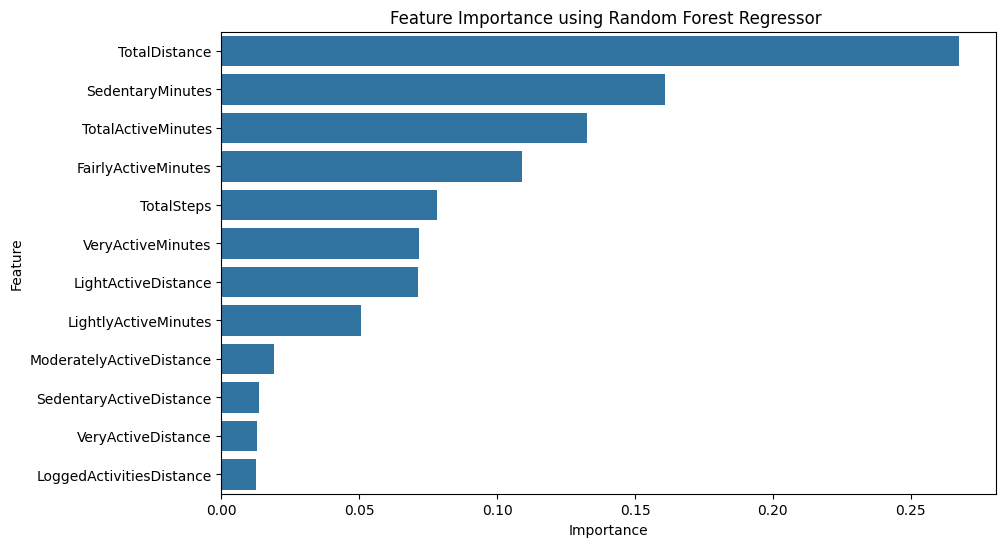

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert index to datetime if not already
new_df.index = pd.to_datetime(new_df.index)

# Sort the DataFrame by index
new_df = new_df.sort_index()

# Subset the necessary columns
data = new_df[['TotalSteps','TotalDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalActiveMinutes','Calories']]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features and target
features = ['TotalSteps','TotalDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalActiveMinutes']
target = 'Calories'

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(train[features], train[target])

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance using Random Forest Regressor ')
plt.show()

By using Random Forest Regressor model for Feature Selection we can conclude that 'TotalDistance' is highly important than other features for predicting 'calories'

# Predictive Modeling

In [32]:
# import libraries for the models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [33]:
# Define features and target variable
features == ['TotalSteps','TotalDistance','SedentaryMinutes', 'TotalActiveMinutes']
X = new_df[features]
y = new_df['Calories']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

XGB Regressor Model

In [36]:
# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy - for regression, this would be different (e.g., R-squared)
accuracy = model.score(X_test, y_test)

print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.6487877899280166


Linear Regression Model

Linear Regression R² Score: 0.7374994429864992


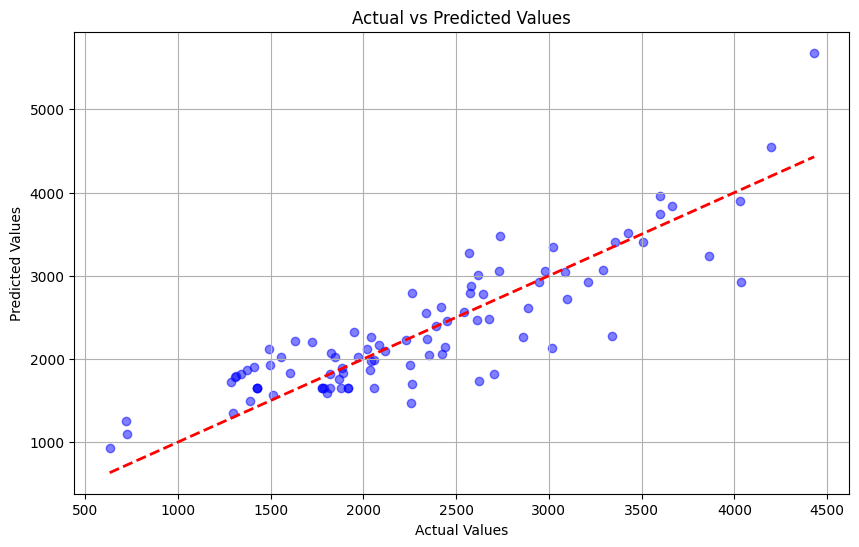

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

# Evaluate the model
lr_r2 = r2_score(y_test, lr_pred)
print(f'Linear Regression R² Score: {lr_r2}')

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

Gradient Boosting Regressor Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)

# Evaluate the model
gb_r2 = r2_score(y_test, gb_pred)
print(f'Gradient Boosting R² Score: {gb_r2}')

Gradient Boosting R² Score: 0.6819220024813525


Thus, by comparing XGB Regressor Model, Linear Regression Model and Gradient Boosting Regressor Model we can conclude that Linear regression model gives high accuracy score of 73% when compared to other models.

# Longitudinal Analysis
Analyzing trends over time to understand changes in activity levels.

In [44]:
# Grouping by date to analyze trends over time
daily_activity = new_df.groupby('ActivityDate').agg({
    'TotalSteps': 'sum',
    'Calories': 'sum',
    'VeryActiveMinutes': 'sum',
    'FairlyActiveMinutes': 'sum',
    'LightlyActiveMinutes': 'sum',
    'SedentaryMinutes': 'sum'
}).reset_index()

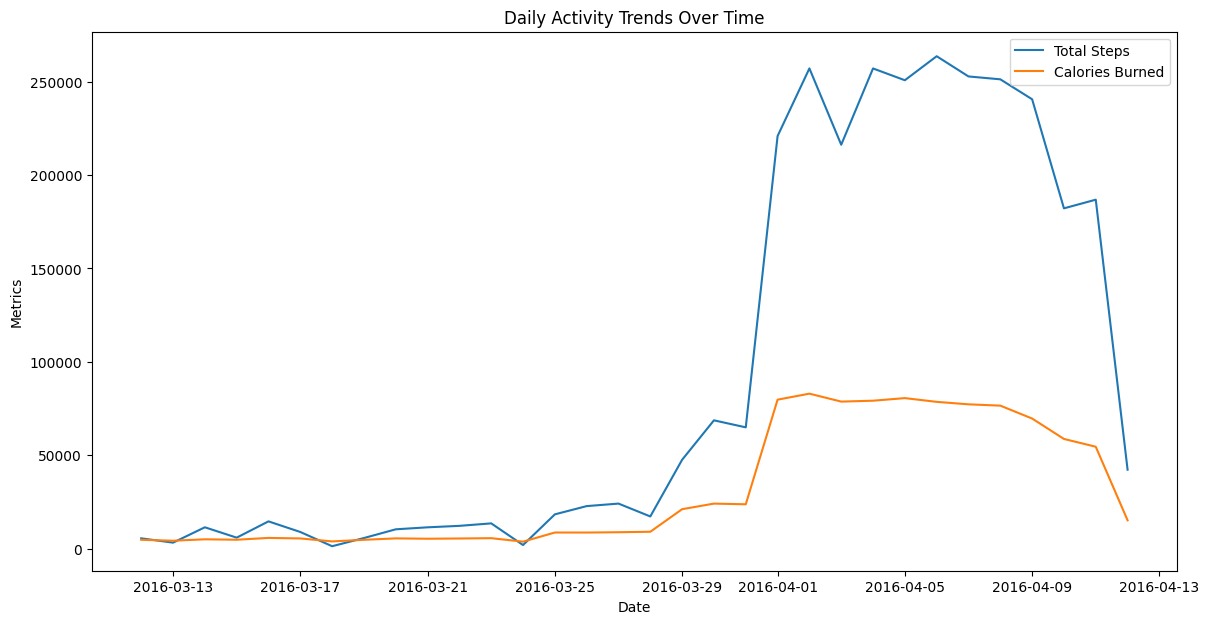

In [45]:
# Plotting trends over time
plt.figure(figsize=(14, 7))
plt.plot(daily_activity['ActivityDate'], daily_activity['TotalSteps'], label='Total Steps')
plt.plot(daily_activity['ActivityDate'], daily_activity['Calories'], label='Calories Burned')
plt.title('Daily Activity Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Personalized Recommendations

In [74]:
# Based on model predictions, provide personalized recommendations
def provide_recommendations(row):
    if row['TotalSteps'] < 5000:
        return "Increase your daily steps to at least 5000 to maintain good health."
    elif row['Calories'] < 2000:
        return "Try to burn more calories to maintain a healthy lifestyle."
    else:
        return "Great job! Keep maintaining your current activity levels."


# Adding recommendations to the dataframe
df['Recommendations'] = df.apply(provide_recommendations, axis=1)

In [75]:
# Displaying the first few rows with recommendations
print(df[['ActivityDate', 'TotalSteps', 'Calories', 'Recommendations']].head(20))

   ActivityDate  TotalSteps  Calories  \
0     3/25/2016       11004      1819   
1     3/26/2016       17609      2154   
2     3/27/2016       12736      1944   
3     3/28/2016       13231      1932   
4     3/29/2016       12041      1886   
5     3/30/2016       10970      1820   
6     3/31/2016       12256      1889   
7      4/1/2016       12262      1868   
8      4/2/2016       11248      1843   
9      4/3/2016       10016      1850   
10     4/4/2016       14557      2030   
11     4/5/2016       14844      2083   
12     4/6/2016       11974      1861   
13     4/7/2016       10198      1755   
14     4/8/2016       12521      1895   
15     4/9/2016       12432      1883   
16    4/10/2016       10057      1755   
17    4/11/2016       10990      1811   
18    4/12/2016         224        50   
19    3/25/2016        1810      1373   

                                      Recommendations  
0   Try to burn more calories to maintain a health...  
1   Great job! Keep mainta